In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/Niklas/Desktop/Master ESCP/NLP/spam.csv", encoding='latin-1')

data_1 = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)

In [25]:
data_1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download("stopwords")
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Niklas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def remove_stop_words(x):
    
    tokens = word_tokenize(x)
    new_tokens = [w for w in tokens if not w in stopwords]
    new_detokenized = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in new_tokens]).strip()
    
    return new_detokenized

In [28]:
data_1["v2"] = data_1["v2"].apply(remove_stop_words)
data_1

,v1,v2
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar ... Joking wif u oni ...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor ... U c already say ...
4,ham,"Nah I n't think goes usf, lives around though"
...,...,...
5567,spam,This 2nd time tried 2 contact u. U å£750 Pound...
5568,ham,Will Ì_ b going esplanade fr home?
5569,ham,"Pity,* mood. So ... suggestions?"
5570,ham,The guy bitching I acted like'd interested buy...


In [29]:
## Split data into train and test data
X = data_1["v2"]
Y = data_1["v1"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
dic = cv.fit(X_train)

In [32]:
print(dic.vocabulary_)

{'sleeping': 6225, 'nt': 4873, 'feeling': 2814, 'well': 7447, 'come': 1911, 'aftr': 850, 'lt': 4265, 'decimal': 2214, 'gt': 3270, 'now': 4868, 'cleaning': 1843, 'house': 3527, 'almost': 915, 'see': 5989, 'sec': 5976, 'yeah': 7669, 'probably': 5438, 'earlier': 2512, 'hello': 3403, 'love': 4243, 'what': 7469, 'did': 2308, 'get': 3127, 'interview': 3725, 'today': 6951, 'are': 1050, 'happy': 3343, 'good': 3193, 'boy': 1474, 'do': 2382, 'think': 6858, 'missing': 4533, '2mro': 408, 'coming': 1917, 'gym': 3294, 'machan': 4309, 'goodnight': 3199, 'free': 2994, 'ring': 5795, 'tone': 6970, 'text': 6806, 'polys': 5312, '87131': 686, 'then': 6841, 'every': 2677, 'week': 7431, 'new': 4785, '0870737910216yrs': 89, '50': 535, 'wk': 7547, 'camera': 1632, 'you': 7694, 'awarded': 1166, 'sipix': 6189, 'digital': 2327, 'call': 1611, '09061221066': 192, 'fromm': 3029, 'landline': 4023, 'delivery': 2246, 'within': 7543, '28': 382, 'days': 2190, 'tbs': 6744, 'persolvo': 5179, 'chasing': 1749, 'us': 7209, 'si

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
## same dictionary with different vectorizer as idf is not possible as only one document
vc_tf_idf = TfidfVectorizer()

vc_dic = vc_tf_idf.fit(X_train)

print(vc_dic.vocabulary_)

{'sleeping': 6225, 'nt': 4873, 'feeling': 2814, 'well': 7447, 'come': 1911, 'aftr': 850, 'lt': 4265, 'decimal': 2214, 'gt': 3270, 'now': 4868, 'cleaning': 1843, 'house': 3527, 'almost': 915, 'see': 5989, 'sec': 5976, 'yeah': 7669, 'probably': 5438, 'earlier': 2512, 'hello': 3403, 'love': 4243, 'what': 7469, 'did': 2308, 'get': 3127, 'interview': 3725, 'today': 6951, 'are': 1050, 'happy': 3343, 'good': 3193, 'boy': 1474, 'do': 2382, 'think': 6858, 'missing': 4533, '2mro': 408, 'coming': 1917, 'gym': 3294, 'machan': 4309, 'goodnight': 3199, 'free': 2994, 'ring': 5795, 'tone': 6970, 'text': 6806, 'polys': 5312, '87131': 686, 'then': 6841, 'every': 2677, 'week': 7431, 'new': 4785, '0870737910216yrs': 89, '50': 535, 'wk': 7547, 'camera': 1632, 'you': 7694, 'awarded': 1166, 'sipix': 6189, 'digital': 2327, 'call': 1611, '09061221066': 192, 'fromm': 3029, 'landline': 4023, 'delivery': 2246, 'within': 7543, '28': 382, 'days': 2190, 'tbs': 6744, 'persolvo': 5179, 'chasing': 1749, 'us': 7209, 'si

In [35]:
## Transform X_train variable to vector format
X_train_trans = cv.fit_transform(X_train)

In [36]:
## Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_trans,Y_train)

X_test_trans = cv.transform(X_test)

predictions = logmodel.predict(X_test_trans)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       976
        spam       1.00      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [39]:
print(confusion_matrix(Y_test, predictions))

[[976   0]
 [ 10 129]]


In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
## Naive Bayes Model
NB_model = MultinomialNB()
NB_model.fit(X_train_trans,Y_train)

NB_predictions = NB_model.predict(X_test_trans)

In [42]:
print(classification_report(Y_test, NB_predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       976
        spam       0.96      0.96      0.96       139

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [43]:
print(confusion_matrix(Y_test, NB_predictions))

[[971   5]
 [  5 134]]


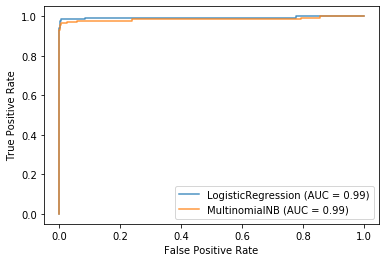

In [44]:
## Checking, which model is better based on AUC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
lr_curve = plot_roc_curve(logmodel, X_test_trans, Y_test,ax=ax, alpha=0.8)
NB_curve = plot_roc_curve(NB_model, X_test_trans, Y_test,ax=ax, alpha=0.8)
plt.show(lr_curve, NB_curve)

In [45]:
## Choosing Logistic Regression Model
lg_proba_predictions = logmodel.predict_proba(X_test_trans)

frame = pd.DataFrame(lg_proba_predictions).rename(columns = {0:"ham",1:"spam"})
frame

,ham,spam
0,0.988398,0.011602
1,0.989525,0.010475
2,0.976166,0.023834
3,0.991879,0.008121
4,0.088295,0.911705
...,...,...
1110,0.995954,0.004046
1111,0.994573,0.005427
1112,0.955512,0.044488
1113,0.992719,0.007281


In [46]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df.index = range(len(Y_test_df))
Y_test_df

,v1
0,ham
1,ham
2,ham
3,ham
4,spam
...,...
1110,ham
1111,ham
1112,ham
1113,ham


In [48]:
## Creating probability dataset for ham and spam
Final = pd.concat([frame, Y_test_df], axis=1)
Final.rename(columns={"ham":"prob_ham","spam":"prob_spam","v1":"prediction"})

,prob_ham,prob_spam,prediction
0,0.988398,0.011602,ham
1,0.989525,0.010475,ham
2,0.976166,0.023834,ham
3,0.991879,0.008121,ham
4,0.088295,0.911705,spam
...,...,...,...
1110,0.995954,0.004046,ham
1111,0.994573,0.005427,ham
1112,0.955512,0.044488,ham
1113,0.992719,0.007281,ham
